# ARN - Practical Work 3 - Mice's sleep stages classification with MLP
Students :
- Baquerizo Emily
- Dousse Rafael

## Exercice 1

In [38]:
#importation of library
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import keras
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from keras.utils import to_categorical

In [60]:
mice_eeg_1 = pd.read_csv('pw3_data/EEG_mouse_data_1.csv')

mice_egg_2 = pd.read_csv('pw3_data/EEG_mouse_data_2.csv')

mice_eeg_total = pd.concat([mice_eeg_1, mice_egg_2])

In [3]:
data_train_1 = mice_eeg_total.iloc[:, :26]
#data_train_1

In [4]:
# data_train preparation
data_train_1["state"][data_train_1["state"] == "w"] = -1
data_train_1["state"][data_train_1["state"] != -1] = 1
#data_train_1["state"]

# data normalization
scaler = StandardScaler()
data_train_normalized_1 = scaler.fit_transform(data_train_1.iloc[:,1:])
#data_train_normalized_1.shape


C:\Users\emily\AppData\Local\Temp\ipykernel_5948\1258160834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_1["state"][data_train_1["state"] == "w"] = -1
C:\Users\emily\AppData\Local\Temp\ipykernel_5948\1258160834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_1["state"][data_train_1["state"] != -1] = 1
c:\Users\emily\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- amplitude_around_26_Hertz
Feature names seen at fit time, yet 

(80109, 25)

In [5]:
# %pip install keras
# %pip install tensorflow

In [6]:
def create_model_1():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(8, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp = create_model_1()
mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True) 

def model_train_1(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_1)) :
        mlp = fctn_model()
        history = mlp.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data.to_numpy())[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data.to_numpy())[test_index]),
            epochs = 10
        )

        cm = confusion_matrix(np.float32(output_data.to_numpy())[test_index] > 0, mlp(np.float32(input_data)[test_index]) > 0)

        history_list.append(history)
        trained_mlp.append(mlp)
        cm_list.append(cm)

    return history_list, trained_mlp, train_index, test_index, cm_list

In [8]:
input_data_1 = data_train_normalized_1
output_data_1 = data_train_1['state']

history_list_1, trained_mlp_1, train_index_1, test_index_1, cm_list_1 = model_train_1(create_model_1, input_data_1, output_data_1)

Epoch 1/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4754 - val_loss: 0.4273
Epoch 2/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4057 - val_loss: 0.3784
Epoch 3/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3834 - val_loss: 0.3860
Epoch 4/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3801 - val_loss: 0.3812
Epoch 5/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3754 - val_loss: 0.3830
Epoch 6/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3722 - val_loss: 0.3795
Epoch 7/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3634 - val_loss: 0.3990
Epoch 8/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3900 - val_loss: 0.4200
Epoch 9/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3811 - val_loss: 0.3663
Epoch 10/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3683 - val_loss: 0.4376
Epoch 1/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5261 - val_loss: 0.4575
Epoch 2/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

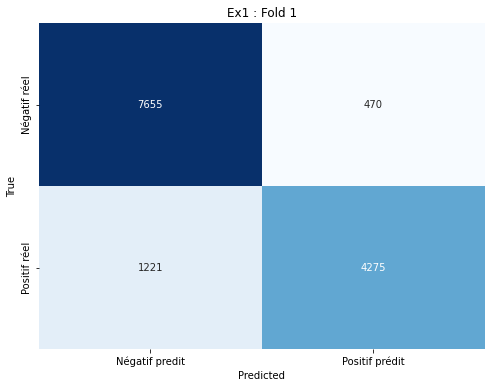

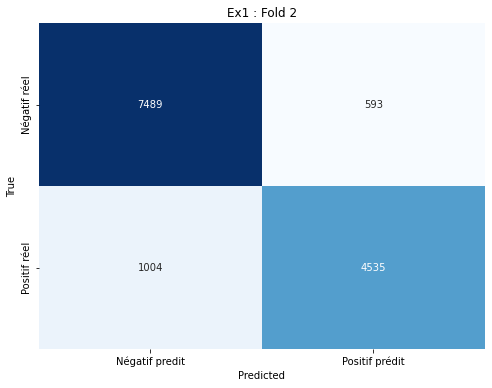

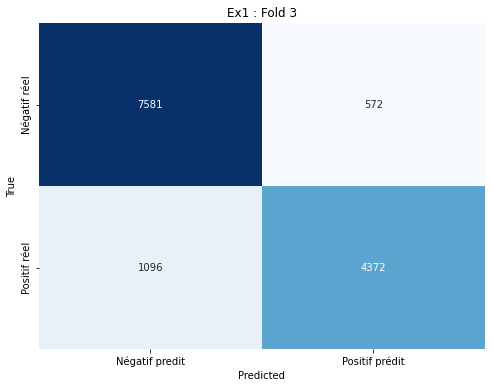

In [9]:
# Plot confusion matrix
def plot_confusion_matrix_1(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Négatif predit", "Positif prédit"], yticklabels=["Négatif réel", "Positif réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()


for i, cm in enumerate(cm_list_1):
    plot_confusion_matrix_1(cm, title=f"Ex1 : Fold {i+1}")

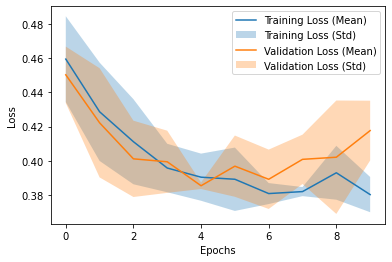

In [10]:
def plot_history(history_l) :
    train_losses = np.array([history.history['loss'] for history in history_l])
    val_losses = np.array([history.history['val_loss'] for history in history_l])

    # Calculate mean and standard deviation for training and validation losses
    mean_train_loss = np.mean(train_losses, axis=0)
    std_train_loss = np.std(train_losses, axis=0)
    mean_val_loss = np.mean(val_losses, axis=0)
    std_val_loss = np.std(val_losses, axis=0)

    # Plot mean and standard deviation for training loss
    pl.plot(mean_train_loss, label='Training Loss (Mean)')
    pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

    # Plot mean and standard deviation for validation loss
    pl.plot(mean_val_loss, label='Validation Loss (Mean)')
    pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

    # Add labels and legend
    pl.xlabel('Epochs')
    pl.ylabel('Loss')
    pl.legend()

    # Display the plot
    pl.show()

plot_history(history_list_1)

In [12]:
#f1 score mean
f1_scores_1 = []

for i, mlp in enumerate(trained_mlp_1):
    y_pred = np.round(mlp.predict(np.float32(input_data_1)[test_index_1]) > 0)
    f1 = f1_score(np.float32(output_data_1.to_numpy())[test_index_1] > 0, y_pred)
    f1_scores_1.append(f1)

f1_mean_1 = np.mean(f1_scores_1)

for i, f1 in enumerate(f1_scores_1):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_1}")

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 1, F1 Score: 0.8417869683964105
Fold 2, F1 Score: 0.8578728236184708
Fold 3, F1 Score: 0.8398002305032654

Mean F1 Score: 0.8464866741727155


## Exercice 2

In [197]:
data_train_2 = mice_eeg_total.iloc[:, :26]
#data_train_2

data_train_2["state"][data_train_2["state"] == "n"] = 0
data_train_2["state"][data_train_2["state"] == "r"] = 1
data_train_2["state"][data_train_2["state"] == "w"] = 2

data_train_2["state"]

# data normalization
scaler_2 = StandardScaler()
data_train_normalized_2 = scaler_2.fit_transform(data_train_2.iloc[:,1:])
data_train_normalized_2.shape

C:\Users\emily\AppData\Local\Temp\ipykernel_5948\283034511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_2["state"][data_train_2["state"] == "n"] = 0
C:\Users\emily\AppData\Local\Temp\ipykernel_5948\283034511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_2["state"][data_train_2["state"] == "r"] = 1
C:\Users\emily\AppData\Local\Temp\ipykernel_5948\283034511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

(40863, 25)

In [198]:
def create_model_2():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(8, activation="sigmoid"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(3, activation="softmax"), # softmax because we have 3 classes
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp_2 = create_model_2()
mlp_2.summary()

Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_291 (Dense)               │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_292 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

In [201]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

def model_train_2(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_2)) :
        mlp_2 = fctn_model()
        history = mlp_2.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data)[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data)[test_index]),
            epochs = 10
        )
        #cm = confusion_matrix(np.float32(output_data)[test_index], np.round(mlp.predict(np.float32(input_data)[test_index])))
    
        history_list.append(history)
        trained_mlp.append(mlp_2)
        #cm_list.append(cm)
    #for i, mlp in enumerate(trained_mlp):
        #y_pred = mlp.predict(np.float32(input_data)[test_index])
        #y_pred = np.round(y_pred)
        #y_pred = y_pred.argmax(axis=1)
        #print(y_pred)
        #np.round(mlp.predict(np.float32(input_data)[test_index]))
        #cm = confusion_matrix(output_data[test_index], np.round(mlp.predict(np.float32(input_data)[test_index])))
        #cm_list.append(cm)
        
    return history_list, trained_mlp, train_index, test_index, cm_list

In [202]:
input_data_2 = data_train_normalized_2
output_data_2 = to_categorical(data_train_2["state"])

history_list_2, trained_mlp_2, train_index_2, test_index_2, cm_list_2 = model_train_2(create_model_2, input_data_2, output_data_2)

Epoch 1/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1055 - val_loss: 0.0674
Epoch 2/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0643 - val_loss: 0.0657
Epoch 3/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0627 - val_loss: 0.0651
Epoch 4/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0621 - val_loss: 0.0646
Epoch 5/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0616 - val_loss: 0.0642
Epoch 6/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0611 - val_loss: 0.0638
Epoch 7/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0607 - val_loss: 0.0636
Epoch 8/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0604 - val_loss: 0.0634
Epoch 9/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0602 - val_loss: 0.0633
Epoch 10/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0601 - val_loss: 0.0632
Epoch 1/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1072 - val_loss: 0.0681
Epoch 2/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step -

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0 0 0 ... 0 2 0]
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[0 0 2 ... 0 2 0]
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0 0 2 ... 0 2 0]


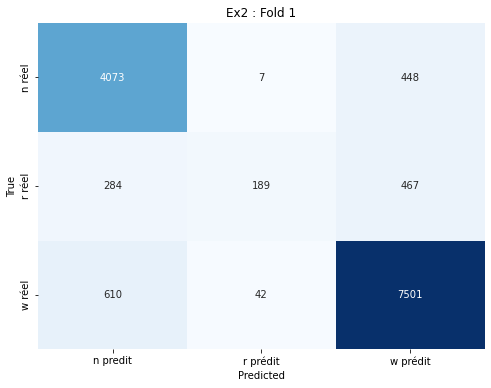

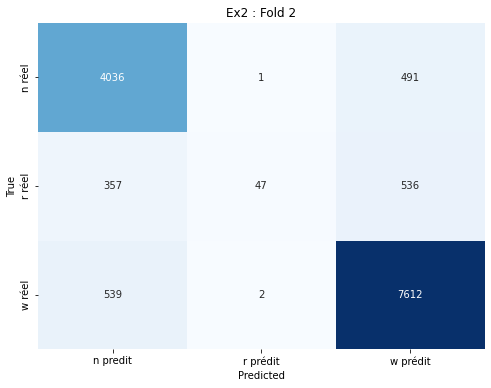

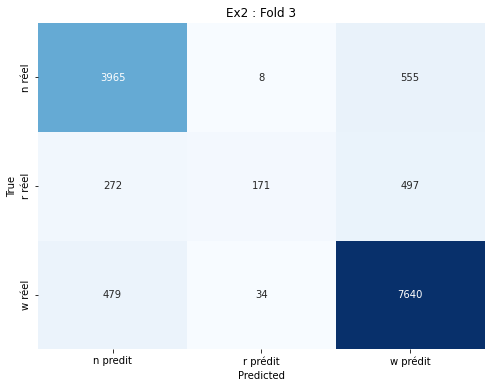

In [194]:
def plot_confusion_matrix_2(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["n predit", "r prédit", "w prédit"], yticklabels=["n réel", "r réel", "w réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()

cm_list_2 = []

for i, mlp in enumerate(trained_mlp_2):
    y_pred = mlp.predict(input_data_2[test_index_2])
    y_pred = np.round(y_pred)
    y_pred = y_pred.argmax(axis=1)
    y_true = np.argmax(output_data_2[test_index_2], axis=1)
    #y_pred = to_categorical(y_pred, num_classes=3)
    print(y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cm_list_2.append(cm)

for i, cm in enumerate(cm_list_2):
    plot_confusion_matrix_2(cm, title=f"Ex2 : Fold {i+1}")

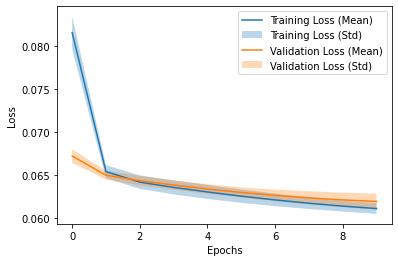

In [204]:
plot_history(history_list_2)

In [205]:
#f1 score mean
f1_scores_2 = []

for i, mlp in enumerate(trained_mlp_2):
    y_pred = np.round(mlp.predict(np.float32(input_data_2)[test_index_2]))
    f1 = f1_score(np.float32(output_data_2)[test_index_2], y_pred, average='micro')
    f1_scores_2.append(f1)

f1_mean_2 = np.mean(f1_scores_2)

for i, f1 in enumerate(f1_scores_2):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_2}")

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 1, F1 Score: 0.8798488385017228
Fold 2, F1 Score: 0.880614744969931
Fold 3, F1 Score: 0.8782566801319349

Mean F1 Score: 0.8795734212011963


## Competition


In [139]:
data_train_3 = mice_eeg_total.iloc[:, :26]
#data_train_3

data_test = pd.read_csv('pw3_data/EEG_mouse_data_test.csv')

In [140]:
# data_train preparation
data_train_3["state"][data_train_3["state"] == "w"] = -1
data_train_3["state"][data_train_3["state"] != -1] = 1
#data_train_3["state"]

# data normalization
scaler = StandardScaler()
data_train_normalized_3 = scaler.fit_transform(data_train_3.iloc[:,1:])
#data_train_normalized_3.shape

data_test_normalized = scaler.transform(data_test.iloc[:,1:26])
data_test_normalized.shape

C:\Users\emily\AppData\Local\Temp\ipykernel_5948\892994702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_3["state"][data_train_3["state"] == "w"] = -1
C:\Users\emily\AppData\Local\Temp\ipykernel_5948\892994702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_3["state"][data_train_3["state"] != -1] = 1
c:\Users\emily\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- amplitude_around_26_Hertz
Feature names seen at fit time, yet no

(80109, 25)

In [177]:
def create_model_3():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(3, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(3, activation = "tanh"), # new hidden layer
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.001),  #0.01
      loss="mse",
  )

  return mlp

mlp_3 = create_model_3()
mlp_3.summary()

Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_263 (Dense)               │ (None, 3)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_264 (Dense)               │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_265 (Dense)               │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

In [178]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True) 

def model_train_3(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_3)) :
        mlp = fctn_model()
        history = mlp.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data.to_numpy())[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data.to_numpy())[test_index]),
            epochs = 20
        )

        cm = confusion_matrix(np.float32(output_data.to_numpy())[test_index] > 0, mlp(np.float32(input_data)[test_index]) > 0)

        history_list.append(history)
        trained_mlp.append(mlp)
        cm_list.append(cm)

    return history_list, trained_mlp, train_index, test_index, cm_list

In [179]:
input_data_3 = data_train_normalized_3
output_data_3 = data_train_3['state']

history_list_3, trained_mlp_3, train_index_3, test_index_3, cm_list_3 = model_train_3(create_model_3, input_data_3, output_data_3)

Epoch 1/20


852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.4168 - val_loss: 0.3647
Epoch 2/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3527 - val_loss: 0.3594
Epoch 3/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3494 - val_loss: 0.3590
Epoch 4/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3467 - val_loss: 0.3610
Epoch 5/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3450 - val_loss: 0.3594
Epoch 6/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3440 - val_loss: 0.3573
Epoch 7/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3434 - val_loss: 0.3556
Epoch 8/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3429 - val_loss: 0.3543
Epoch 9/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3424 - val_loss: 0.3534
Epoch 10/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3420 - val_loss: 0.3529
Epoch 11/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3417 - val_loss: 0.3524
Epoch 12/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.

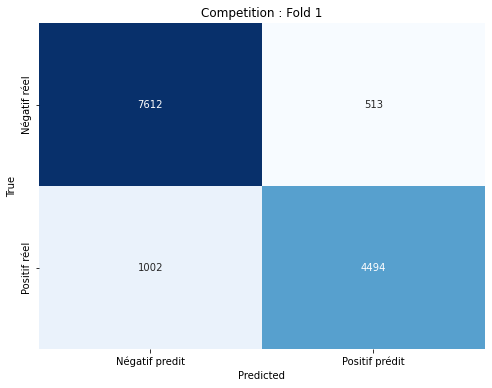

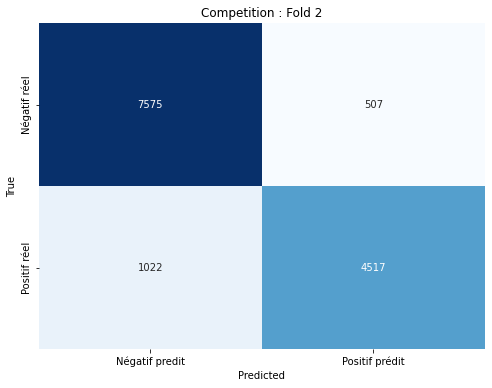

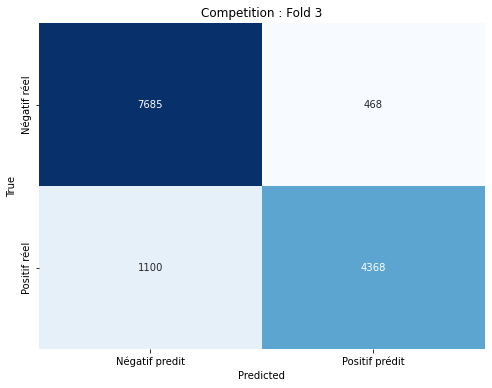

In [180]:
# Plot confusion matrix
def plot_confusion_matrix_3(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Négatif predit", "Positif prédit"], yticklabels=["Négatif réel", "Positif réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()


for i, cm in enumerate(cm_list_3):
    plot_confusion_matrix_1(cm, title=f"Competition : Fold {i+1}")

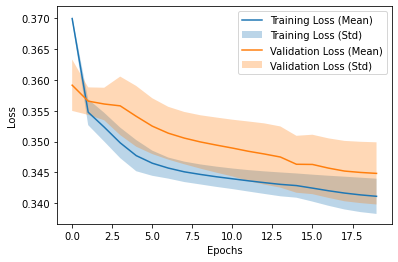

In [181]:
plot_history(history_list_3)

In [182]:
#f1 score mean
f1_scores_3 = []

for i, mlp in enumerate(trained_mlp_3):
    y_pred = np.round(mlp.predict(np.float32(input_data_3)[test_index_3]) > 0)
    f1 = f1_score(np.float32(output_data_3.to_numpy())[test_index_3] > 0, y_pred)
    f1_scores_3.append(f1)

f1_mean_3 = np.mean(f1_scores_3)

for i, f1 in enumerate(f1_scores_3):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_3}")

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Fold 1, F1 Score: 0.8567891830127595
Fold 2, F1 Score: 0.8588089092820955
Fold 3, F1 Score: 0.8478260869565217

Mean F1 Score: 0.8544747264171256


### Résultat de différente combinaison, à voir ce qu'on garde
#### 1. 0.8536443148
- LR : 0.001
- M : 0.9
- epoch : 10

Layers :
- 8, tanh
- 1, tanh

#### 2. 0.8567042042007113
- LR : 0.1
- M : 0.0
- epoch : 10

Layers :
- 5, tanh
- 3, tanh
- 1, tanh